# Libraries

In [55]:
import pandas as pd #for table view
import matplotlib.pyplot as plt #for plotting the table
import numpy as np #for mathematical computation
from scipy import stats as st #for statistic computation
import seaborn as sns #advance plotting
from wordcloud import WordCloud, STOPWORDS #wordclouds so we know which "words" is the most mentioned in the data


# Importing Dataset

In [56]:
df_1 = pd.read_csv("foodstruct_nutritional_facts.csv")

In [57]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Food Name                             1174 non-null   object 
 1   Category Name                         1174 non-null   object 
 2   Calcium                               1149 non-null   float64
 3   Calories                              1174 non-null   float64
 4   Carbs                                 1174 non-null   float64
 5   Cholesterol                           1119 non-null   float64
 6   Copper                                1094 non-null   float64
 7   Fats                                  1174 non-null   float64
 8   Fiber                                 1076 non-null   float64
 9   Folate                                1071 non-null   float64
 10  Iron                                  1153 non-null   float64
 11  Magnesium        

In [58]:
df_1.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.0,0.00018,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.0,0.00089,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.0,0.00430,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.0,0.00210,0.000021,0.11,0.0,0.02,NaN,NaN,NaN,NaN


In [59]:
df_1.tail()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
1169,Sesame chicken,"Meals, Entrees, and Side Dishes",0.012,293.0,27.0,0.059,0.00005,14.0,0.7,0.000008,...,1.000000e-07,0.00130,2.700000e-05,0.77,0.01,0.04,0.0,0.01,5.9,NaN
1170,Vermicelli,"Meals, Entrees, and Side Dishes",0.055,331.0,82.0,0.000,0.00190,0.1,3.9,0.000000,...,0.000000e+00,0.00051,3.800000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,Baby food,Baby Foods,0.733,379.0,73.0,0.000,0.00033,4.4,7.5,0.000043,...,0.000000e+00,0.00370,1.500000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,Zwieback,Baby Foods,0.020,426.0,74.0,0.008,0.00015,9.7,2.5,0.000087,...,0.000000e+00,0.00240,9.000000e-07,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1173,Cherry juice,Baby Foods,0.007,47.0,11.0,0.000,0.00002,0.1,0.3,0.000000,...,0.000000e+00,0.00002,2.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_1.isnull().sum()

Food Name                                  0
Category Name                              0
Calcium                                   25
Calories                                   0
Carbs                                      0
Cholesterol                               55
Copper                                    80
Fats                                       0
Fiber                                     98
Folate                                   103
Iron                                      21
Magnesium                                 61
Monounsaturated Fat                      110
Net carbs                                  1
Omega-3 - DHA                            272
Omega-3 - DPA                            279
Omega-3 - EPA                            271
Phosphorus                                48
Polyunsaturated fat                      110
Potassium                                 45
Protein                                    0
Saturated Fat                             81
Selenium  

# Exploration Data Analysis

In [61]:
#search for the unique value in Genre column
Catagory_name = df_1['Category Name'].value_counts()
Catagory_name

Category Name
Baked Products                     106
Meat                               100
Sweets                              96
Meals, Entrees, and Side Dishes     90
Vegetables                          90
Fruits                              89
Beverages                           84
Seafood                             83
Grains                              68
Soups                               67
Greens                              60
Dairy                               58
Oils and Sauces                     54
Spices                              46
Fast Foods                          45
Nuts                                27
Mushrooms                            8
Baby Foods                           3
Name: count, dtype: int64

<Axes: xlabel='Category Name'>

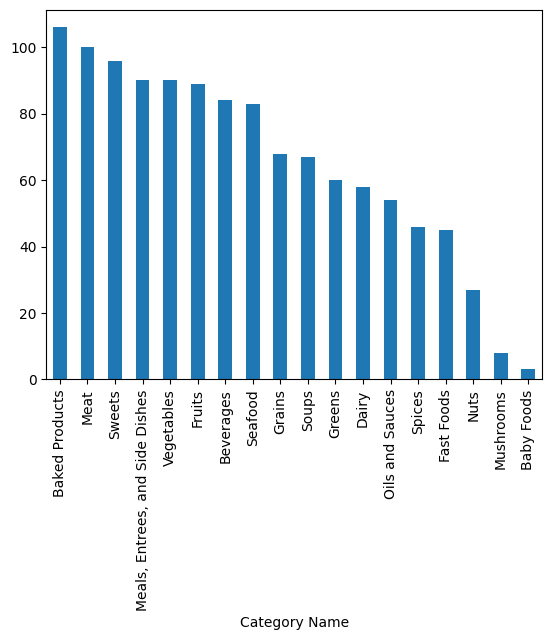

In [62]:
Catagory_name.plot(kind='bar')

In [63]:
category_x_calories = df_1[['Category Name', 'Calories']].value_counts()
category_x_calories

Category Name                    Calories
Oils and Sauces                  884.0       18
Beverages                        0.0          6
                                 83.0         5
Meals, Entrees, and Side Dishes  380.0        5
Beverages                        1.0          5
                                             ..
Grains                           573.0        1
                                 584.0        1
Greens                           11.0         1
                                 14.0         1
Vegetables                       345.0        1
Name: count, Length: 920, dtype: int64

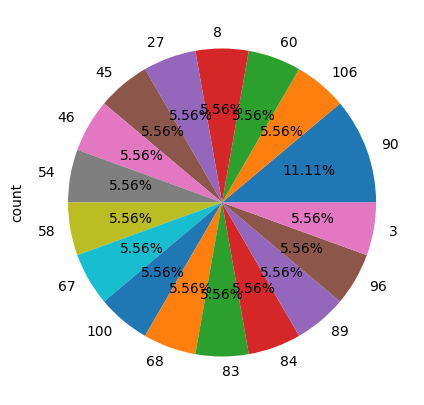

In [64]:
fig,ax1 = plt.subplots(figsize=(5,5))
Catagory_name.value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

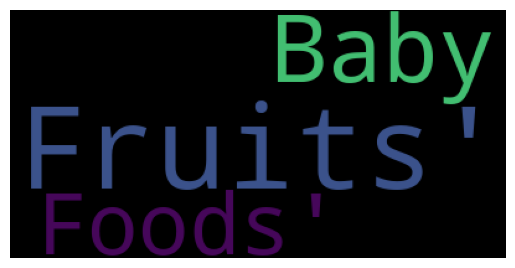

In [73]:
fields = ['Category Name']

text = df_1['Category Name'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Feature Engineering